In [5]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the data
data = pd.read_csv(r"C:\Users\shruthi\Downloads\main.csv")

# Display the first few rows of the data to understand its structure
data.head()

,Unnamed: 0,DATE,AUTHOR,TITLE,cleaned,sentiment,sentiment_score,emotion,emotion_score,ARTICLE
0,205074,2019-06-29,Field Level Media,"Sanchez, Nationals shut down Tigers","Sanchez , Nationals shut tiger",neutral,0.892794,anger,0.772276,Anibal Sanchez pitched six strong innings Frid...
1,205655,2019-06-11,Field Level Media,Rays top A's as Morton's unbeaten streak hits 21,ray Morton unbeaten streak hit 21,neutral,0.626775,joy,0.990553,"Aided by three home runs, right-hander Charlie..."
2,205885,2019-06-15,Field Level Media,"Jimenez, White Sox crush Sabathia, Yankees","Jimenez , White Sox crush Sabathia , Yankees",neutral,0.899590,anger,0.657171,EditorsNote: Changed stat ‘eight runs’ to ‘fiv...
3,206081,2019-06-15,Field Level Media,"Giants crack three homers, down Brewers","giant crack homer , brewer",neutral,0.829722,anger,0.467322,Kevin Pillar had three hits and drove in the t...
4,206131,2019-06-19,Field Level Media,"A's crack six homers, obliterate Orioles","crack homer , obliterate Orioles",neutral,0.706669,anger,0.490198,Beau Taylor triggered a six-homer assault on B...


In [3]:
# Check the unique emotions in the dataset and calculate mean emotion scores
emotion_distribution = data['emotion'].value_counts()
average_emotion_scores = data.groupby('emotion')['emotion_score'].mean()

emotion_distribution, average_emotion_scores

(anger       21417
 joy         17426
 fear         5410
 sadness      3217
 love          355
 surprise      181
 Name: emotion, dtype: int64,
 emotion
 anger       0.771133
 fear        0.730765
 joy         0.793491
 love        0.793129
 sadness     0.782808
 surprise    0.805796
 Name: emotion_score, dtype: float64)

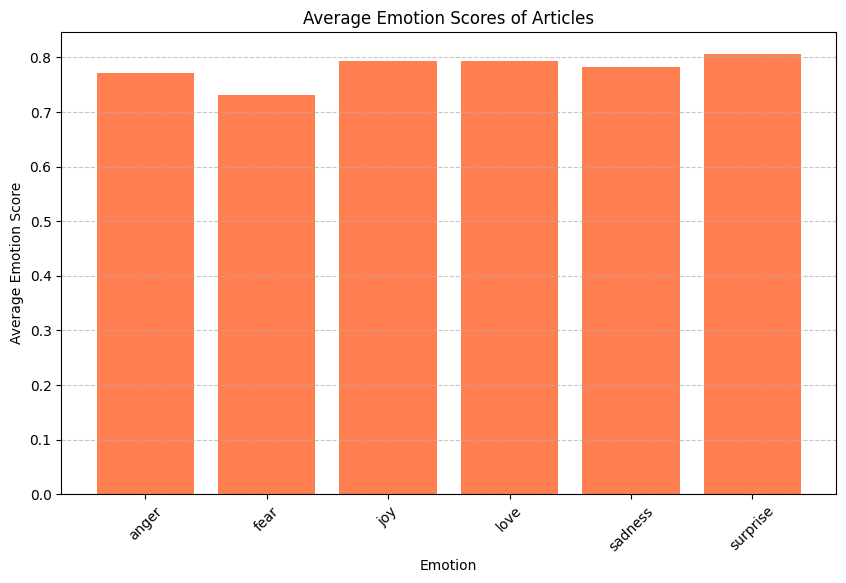

In [6]:
# Create a bar chart for the average emotion scores
plt.figure(figsize=(10, 6))
plt.bar(average_emotion_scores.index, average_emotion_scores.values, color='coral')
plt.title('Average Emotion Scores of Articles')
plt.xlabel('Emotion')
plt.ylabel('Average Emotion Score')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

bar chart for the average emotion scores across the articles shows the average intensity of each emotion, with "surprise" having the highest average score, indicating a generally strong expression of this emotion in the articles where it appears.

In [7]:
# Calculate the average length of the articles in terms of number of words
data['article_length'] = data['ARTICLE'].apply(lambda x: len(x.split()))  # Split articles into words and count them
average_article_length = data['article_length'].mean()  # Calculate the average length
average_article_length

337.7476982043911

The average article length of approximately 338 words suggests that the articles are concise, likely designed to deliver information efficiently, possibly catering to readers who prefer quick updates or summaries rather than in-depth analysis. This length is typical for news articles or updates that aim to keep readers informed without requiring extensive reading time.

In [8]:
 #Calculate the mode of the 'emotion' column
emotion_mode = data['emotion'].mode()[0]
emotion_mode

'anger'

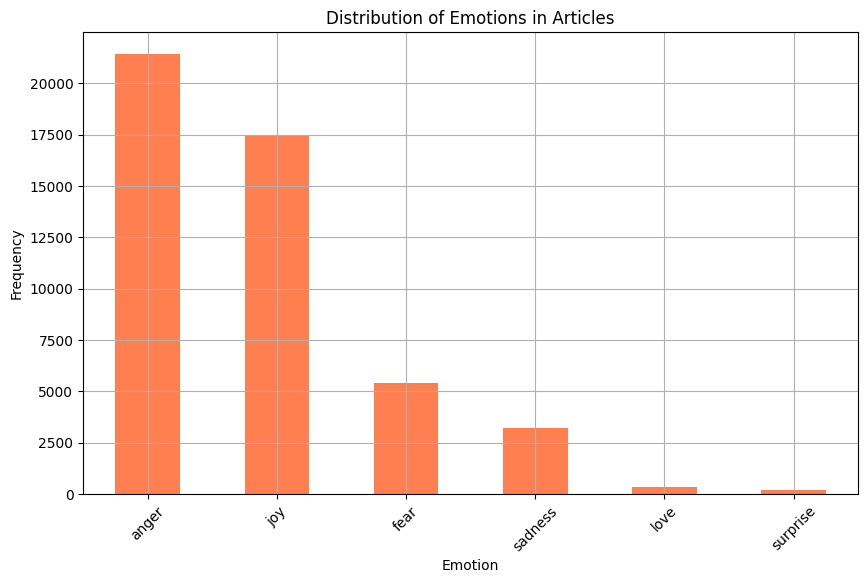

In [9]:
# Count of each emotion type
emotion_counts = data['emotion'].value_counts()

# Plot the counts of each emotion
plt.figure(figsize=(10, 6))
emotion_counts.plot(kind='bar', color='coral')
plt.title('Distribution of Emotions in Articles')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

The predominance of "anger" as the most frequent emotion in the articles suggests that the dataset largely comprises content focused on provocative or conflict-driven topics, potentially aimed at engaging readers through strong emotional responses.

In [10]:
data['title_length'] = data['TITLE'].apply(len)

# Calculate mean and standard deviation again for title lengths
mean_title_length = data['title_length'].mean()
std_title_length = data['title_length'].std()
mean_title_length,std_title_length



(62.38182727159105, 17.67389274801925)

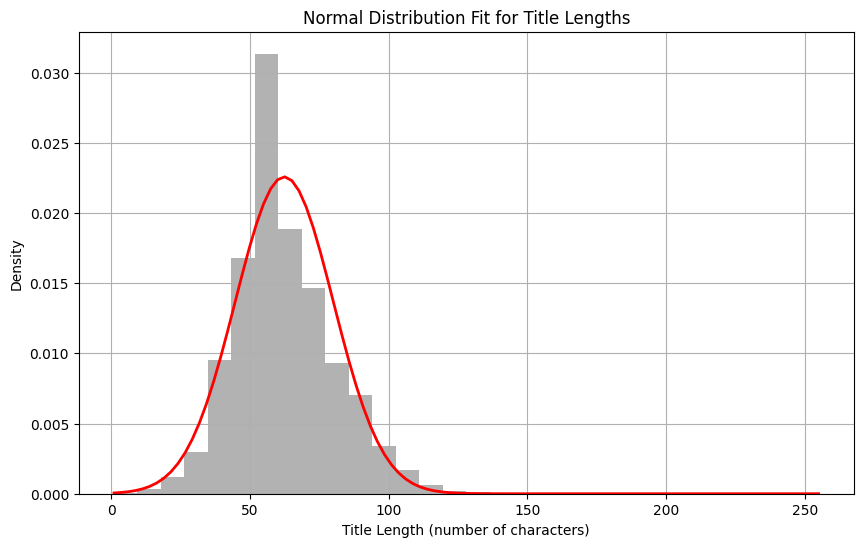

In [12]:
# Create a range of values for x (title length) and calculate the normal distribution manually
import numpy as np
x_normal = np.linspace(data['title_length'].min(), data['title_length'].max(), 100)
p_normal = (1 / (std_title_length * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_normal - mean_title_length) / std_title_length) ** 2)

# Plot the histogram and the normal distribution curve manually
plt.figure(figsize=(10, 6))
plt.hist(data['title_length'], bins=30, density=True, alpha=0.6, color='grey')
plt.plot(x_normal, p_normal, 'r', linewidth=2)
plt.title('Normal Distribution Fit for Title Lengths')
plt.xlabel('Title Length (number of characters)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

From the normal distribution of title lengths, we can infer that most titles in your dataset are around 62 characters long, indicating a strategy to keep titles concise yet informative. The variability shown suggests flexibility in title length to accommodate different topics, while the overall symmetry around the mean points to consistent editorial standards. This balance reflects a deliberate editorial strategy aimed at optimizing title lengths for reader engagement and readability.